In [1]:
using Plots
using LinearAlgebra
using Printf
using LaTeXStrings
using DifferentialEquations

In [13]:
default(lw=2,markersize = 6,
    xtickfont=font(12), ytickfont=font(12), 
    guidefont=font(14), legendfont=font(12),titlefont=font(12))

# Linear Problem
Solve
$$
u'' = e^x, \quad 0<x<1,
$$
with Dirihclet boundary conditions, $u(0) = u(1) = 0$, and compare against our previous finite difference solution.

In [2]:
include("bvps1d.jl"); # include source file

In [3]:
n = 32;
x_fd = LinRange(0, 1, n + 1)[2:end-1];
Δx = x_fd[2] - x_fd[1];
f_fd = @. exp(x_fd);
A = assemble_spmatrix(n, Δx);
u_fd = A \f_fd;

Need to recast this as a first order system for the boundary value problem solver,
\begin{align*}
u_1' & = u_2\\
u_2' & = e^x
\end{align*}
We also recast the boundary conditions as functions which we are trying to zero out:
\begin{equation*}
G_{\rm bc}(u) = \begin{pmatrix} u(0)\\ u(1) \end{pmatrix}
\end{equation*}
and we want $G_{\rm bc}(u) = 0$ in $\mathbb{R}^2$.

In [4]:
function bvp_rhs!(du, u, p, t)
    du[1] = u[2];
    du[2] = exp(t);
end

function bvp_bc!(res, u, p, t)
    res[1] = u[1][1] # u_1(x_1) = u(0) = 0
    res[2] = u[end][1] # u_1(x_n) = u(1) = 0
end

bvp_bc! (generic function with 1 method)

In [19]:
tspan  = (0, 1)
# [0., 0.] is an initial (constant) guess for the solution of the bvp
bvp = BVProblem(bvp_rhs!, bvp_bc!, [0., 0.],tspan)


BVProblem with uType Vector{Float64} and tType Int64. In-place: true
timespan: (0, 1)
u0: 2-element Vector{Float64}:
 0.0
 0.0

In [16]:
# solve with 4th order collocation method, must specify an initial mesh spacing
soln = solve(bvp, MIRK4(), dt =0.1) 


retcode: Success
Interpolation: MIRK Order 4 Interpolation
t: 11-element Vector{Float64}:
 0.0
 0.1
 0.2
 0.3
 0.4
 0.5
 0.6
 0.7
 0.8
 0.9
 1.0
u: 11-element Vector{Vector{Float64}}:
 [0.0, -0.7182816148482148]
 [-0.06665725783023474, -0.6131106931218858]
 [-0.122253594803203, -0.4968788490027366]
 [-0.16562572371758388, -0.3684227951279509]
 [-0.19548801338910815, -0.22645690013477923]
 [-0.21041962162154998, -0.0695603216297447]
 [-0.20885027494046624, 0.1038372140795922]
 [-0.18904455276847654, 0.29547112781153506]
 [-0.14908451875282994, 0.507259356185096]
 [-0.08685052541374627, 0.741321546974319]
 [0.0, 1.000000273255642]

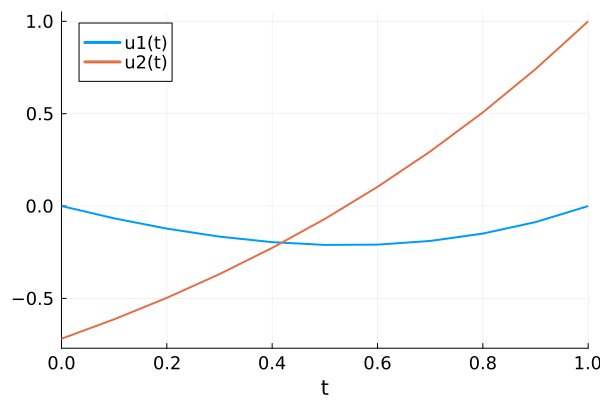

In [17]:
plot(soln)

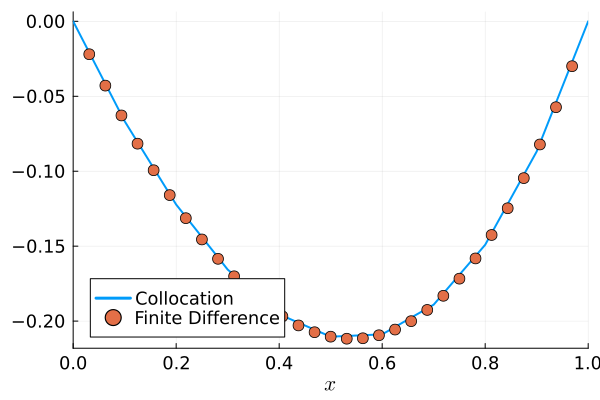

In [18]:
plot(soln, idxs=(1), label="Collocation")
scatter!(x_fd, u_fd, label="Finite Difference")
xlabel!(L"x")

# Nonlinear example
$$
u'' = -|u|,\quad 0<t<4
$$
with $u(0) = 0$, $u(4) = -2$ 

In [20]:
function bvp_rhs!(du, u, p, t)
    du[1] = u[2];
    du[2] = -abs(u[1]);
end

function bvp_bc!(res, u, p, t)
    res[1] = u[1][1] # u_1(x_1) = u(0) = 0
    res[2] = u[end][1]+2 # u_1(x_n) = u(1) = -2
end

bvp_bc! (generic function with 1 method)

In [22]:
tspan  = (0, 4)
# [0., 0.] is an initial (constant) guess for the solution of the bvp
bvp = BVProblem(bvp_rhs!, bvp_bc!, [0., 0.],tspan)


BVProblem with uType Vector{Float64} and tType Int64. In-place: true
timespan: (0, 4)
u0: 2-element Vector{Float64}:
 0.0
 0.0

In [23]:
# solve with 4th order collocation method, must specify an initial mesh spacing
soln = solve(bvp, MIRK4(), dt =0.1) 


retcode: Success
Interpolation: MIRK Order 4 Interpolation
t: 161-element Vector{Float64}:
 0.0
 0.025
 0.05
 0.07500000000000001
 0.1
 0.125
 0.15000000000000002
 0.17500000000000002
 0.2
 0.225
 0.25
 0.275
 0.3
 ⋮
 3.725
 3.75
 3.775
 3.8
 3.8249999999999997
 3.8499999999999996
 3.875
 3.9
 3.925
 3.95
 3.975
 4.0
u: 161-element Vector{Vector{Float64}}:
 [0.0, 2.0665835824565786]
 [0.051659207973491605, 2.065937808722861]
 [0.10328613062361462, 2.0640008911092718]
 [0.1548485028042766, 2.0607740401262675]
 [0.20631409971132725, 2.0562592724506725]
 [0.25765075702201207, 2.0504594096653195]
 [0.308826390996627, 2.0433780764956504]
 [0.3598090185298115, 2.035019698544385]
 [0.41056677713894796, 2.0253894995256596]
 [0.4610679448771764, 2.0144934980003786]
 [0.5112809601585788, 2.0023385036148076]
 [0.5611744414831424, 1.988932112844767]
 [0.6107172070491762, 1.974282704248082]
 ⋮
 [-1.2752261074961733, -2.42836653983621]
 [-1.336340123942177, -2.461009417579307]
 [-1.3982893964662997,

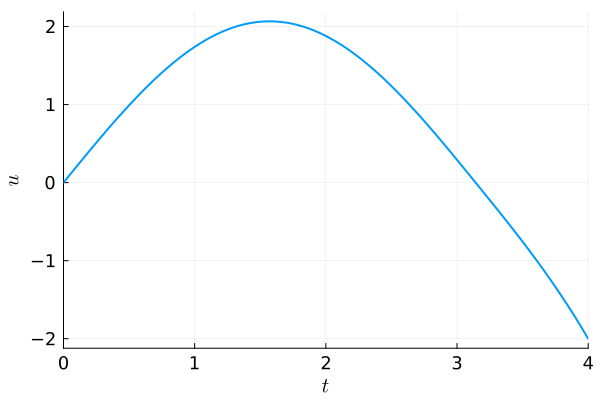

In [26]:
plot(soln, idxs=(1),label="")
xlabel!(L"t")
ylabel!(L"u")
